In [2]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
from gp4gw.deep_kernel import DeepKernel
from scipy.cluster.vq import kmeans2

2021-11-18 17:03:55.897207: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [9]:
data_dim = 1
RBF = gpflow.kernels.RBF(lengthscales=[1.0] * data_dim, variance=1.0)
Matern = gpflow.kernels.Matern12(lengthscales=[0.1] * data_dim, variance=1.0)

ArcCosine = gpflow.kernels.ArcCosine(order=0, variance=1.0, weight_variances=[1.0]*data_dim, bias_variance=1.0)

kernel = DeepKernel(
    data_dim, data_dim, RBF*Matern
) 

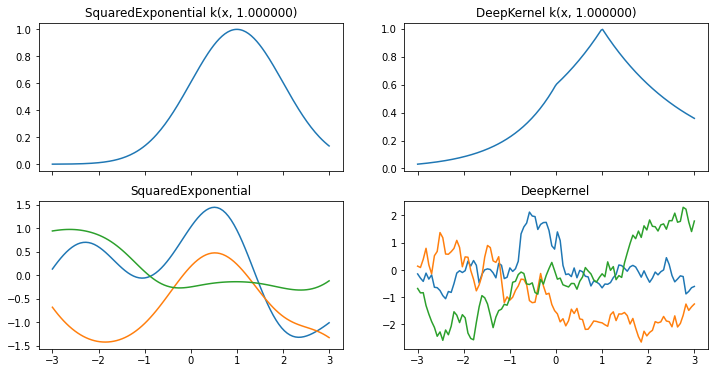

In [10]:
k3 = RBF
k4 = kernel

def plotkernelfunction(k, ax, xmin=-3, xmax=3, other=0):
    xx = np.linspace(xmin, xmax, 200)[:, None]
    ax.plot(xx, k(xx, np.zeros((1, 1)) + other))
    ax.set_title(k.__class__.__name__ + " k(x, %f)" % other)
    
def plotkernelsample(k, ax, xmin=-3, xmax=3):
    xx = np.linspace(xmin, xmax, 100)[:, None]
    K = k(xx)
    ax.plot(xx, np.random.multivariate_normal(np.zeros(100), K, 3).T)
    ax.set_title(k.__class__.__name__)


f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
plotkernelfunction(k3, axes[0, 0], other=1.0)
plotkernelfunction(k4, axes[0, 1], other=1.0)
plotkernelsample(k3, axes[1, 0])
plotkernelsample(k4, axes[1, 1])

In [68]:
num_data = 20000
D = 1
a, b = 0, 1
X = np.linspace(a, b, num_data).reshape(-1, 1)

In [69]:
M = 500 # number of inducing points
Z = kmeans2(X, M, minit="points")[0]

In [70]:
K = kernel(Z)

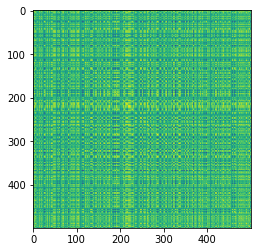

In [71]:
plt.imshow(K)